In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\BlackFriday\train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [21]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [34]:
print(df.shape)

(550068, 12)


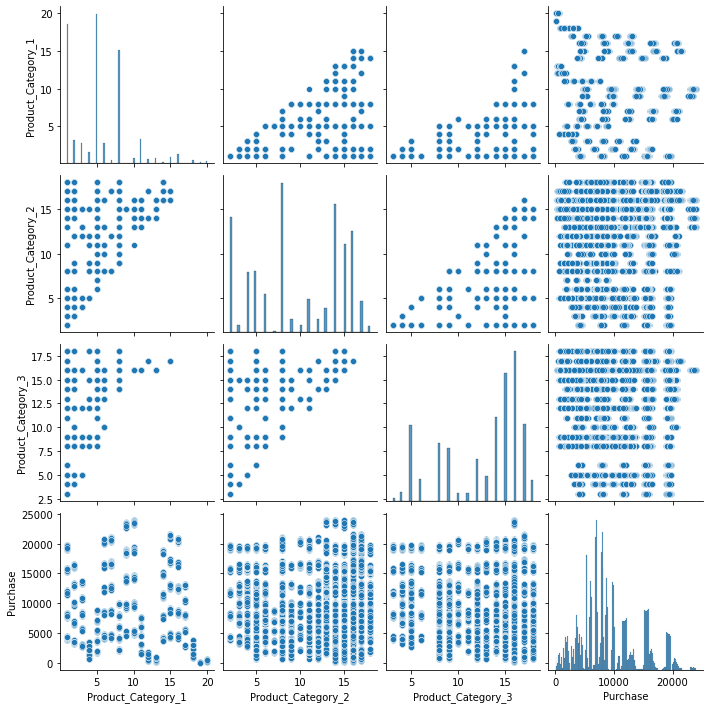

In [11]:
sns.pairplot(df[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']])

In [37]:
df1 = df.groupby('User_ID').first()
df1 = df1.loc[:, ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
df1['Purchase'] = df.groupby('User_ID').sum()['Purchase']
df1['Products_Purchased'] = df.groupby('User_ID').count()['Purchase']
df1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Products_Purchased
User_ID,,,,,,,,
1000001,F,0-17,10,A,2,0,334093,35
1000002,M,55+,16,C,4+,0,810472,77
1000003,M,26-35,15,A,3,0,341635,29
1000004,M,46-50,7,B,2,1,206468,14
1000005,M,26-35,20,A,1,1,821001,106


In [36]:
d = df.groupby('User_ID').count()['Purchase']
d.head()

User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
Name: Purchase, dtype: int64

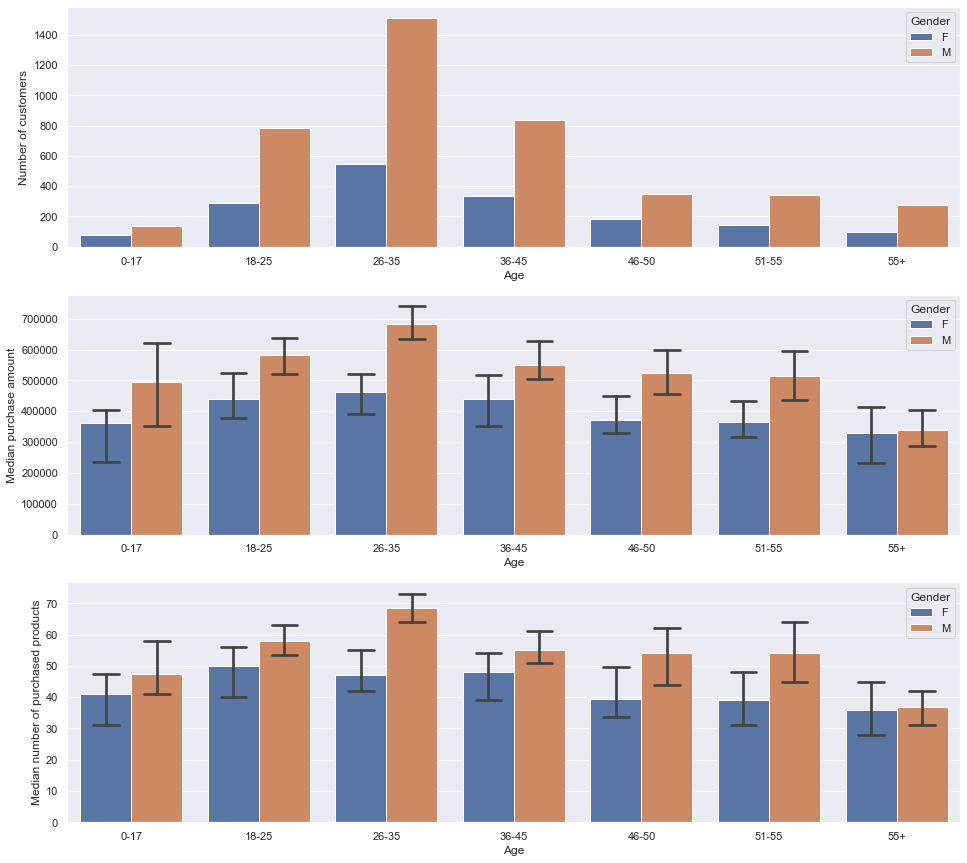

In [38]:
sns.set()
fig, axes = plt.subplots(3, 1, figsize=(16, 15))
sns.countplot(ax=axes[0], x='Age', hue='Gender', data=df1.sort_values('Age'))
axes[0].set_ylabel('Number of customers')
sns.barplot(ax=axes[1], x='Age', y='Purchase', hue='Gender', data=df1.sort_values('Age'), estimator=np.median, capsize=.2)
axes[1].set_ylabel('Median purchase amount')
sns.barplot(ax=axes[2], x='Age', y='Products_Purchased', hue='Gender', data=df1.sort_values('Age'), estimator=np.median, capsize=.2)
axes[2].set_ylabel('Median number of purchased products')
plt.show()

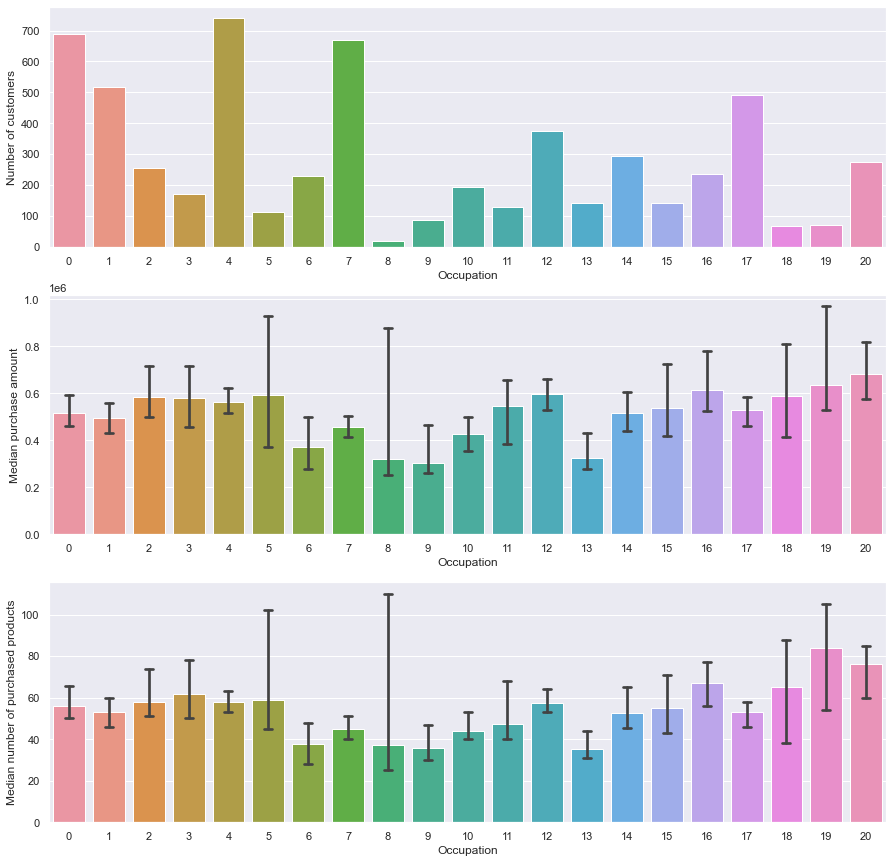

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(ax=axes[0], x='Occupation', data=df1.sort_values('Occupation'))
axes[0].set_ylabel('Number of customers')
sns.barplot(ax=axes[1], x='Occupation', y='Purchase', data=df1, estimator=np.median, capsize=.2)
axes[1].set_ylabel('Median purchase amount')
sns.barplot(ax=axes[2], x='Occupation', y='Products_Purchased', data=df1, estimator=np.median, capsize=.2)
axes[2].set_ylabel('Median number of purchased products')
plt.show()

<AxesSubplot:>

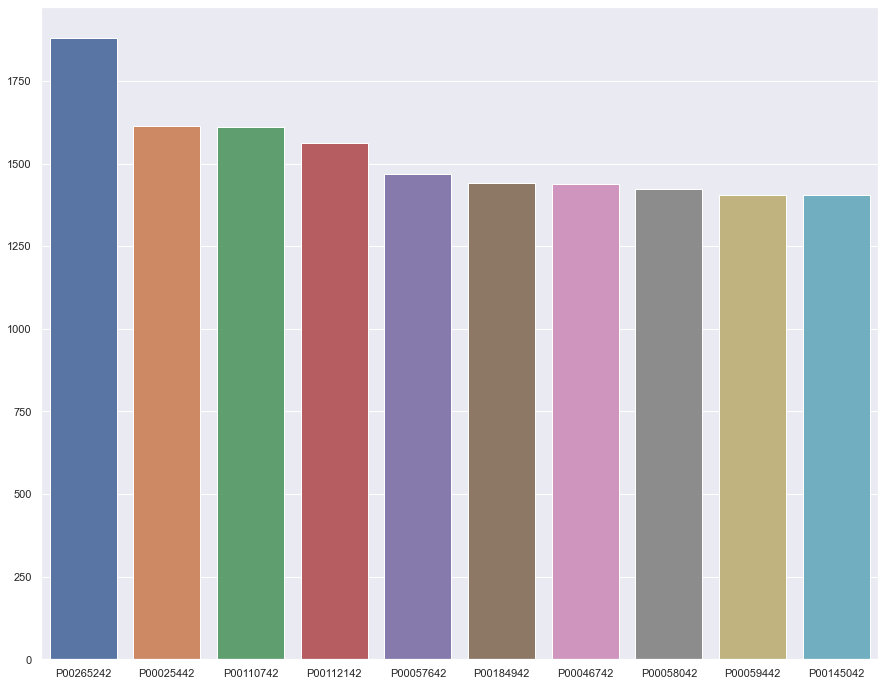

In [78]:
fig, axes = plt.subplots(figsize=(15, 12))
d = df['Product_ID'].value_counts().head(10)
sns.barplot(x=d.index,y=d.values, data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

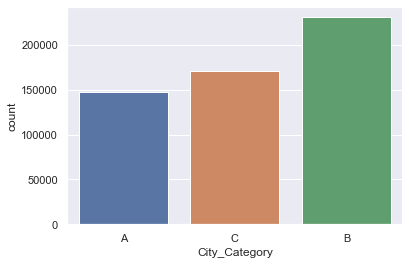

In [80]:
sns.countplot(df['City_Category'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


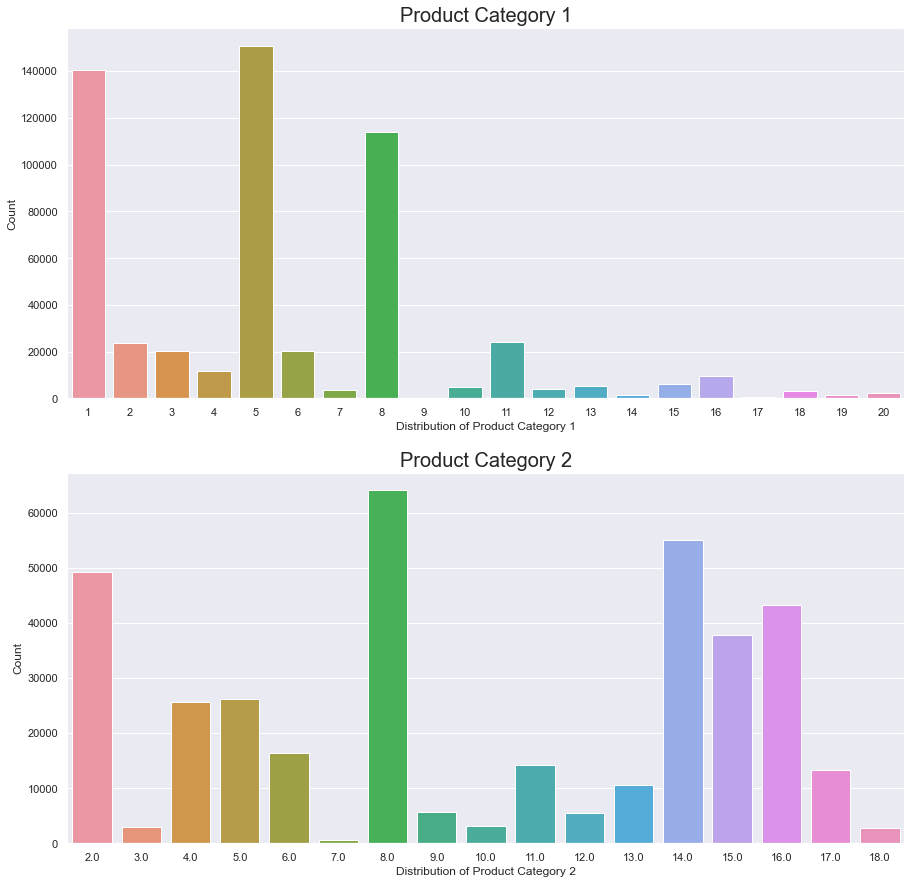

In [84]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
plt.subplot(2, 1, 1)
sns.countplot(df['Product_Category_1'], )
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.countplot(df['Product_Category_2'])
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.show()

In [35]:
df = df.drop(['Product_ID','User_ID'],axis=1)

In [36]:
df.shape

(550068, 10)

In [37]:
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])

df = pd.concat([df, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,NaN,NaN,8370,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969,...,0,1,0,0,1,0,0,0,0,1


In [38]:
df = df.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)

In [10]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,0-17,18-25,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,NaN,NaN,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,NaN,NaN,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,NaN,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,NaN,NaN,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [46]:
df.isnull().sum()

Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
F                          0
M                          0
0-17                       0
18-25                      0
26-35                      0
36-45                      0
46-50                      0
51-55                      0
55+                        0
A                          0
B                          0
C                          0
0                          0
1                          0
2                          0
3                          0
4+                         0
dtype: int64

In [49]:
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [51]:
df=df.drop('Product_Category_3',axis=1)

In [52]:
df.isnull().sum()

Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Purchase              0
F                     0
M                     0
0-17                  0
18-25                 0
26-35                 0
36-45                 0
46-50                 0
51-55                 0
55+                   0
A                     0
B                     0
C                     0
0                     0
1                     0
2                     0
3                     0
4+                    0
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [59]:
x=df.drop('Purchase',axis=1)
y=df.Purchase

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(x_test)

In [67]:
y_pred.shape


(165021,)

In [68]:
y_test.shape

(165021,)

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=150)
rfr.fit(x_train,y_train)
rfrpredict=rfr.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error
print("RMSE score for Linear_Regression : ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,rfrpredict)))

RMSE score for Linear_Regression :  4695.885552254505
RMSE score for Random_Forest :  3027.825676221782


In [86]:
y_pred
y_test

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
284287     1840
50876      4050
533433    11836
44339      9548
500108     6888
Name: Purchase, Length: 165021, dtype: int64

In [87]:
x_train.shape

(385047, 21)